In [79]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation,Flatten
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from tensorflow.keras import backend as K
from tensorflow import keras


In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

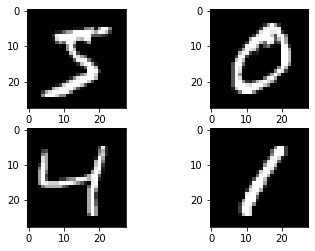

In [81]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [82]:

print(y_train[0])
print(y_train[2])

5
4


In [83]:
subset=10000 #size
nb_classes=10
X_train = X_train[:subset].reshape(subset, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train[:subset], nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [84]:
print(len(X_train))
print(len(y_train))

10000
10000


In [85]:
model = Sequential([
    Input(shape=(784,)),
    Dense(12, name="layer1", input_shape=(12,), activation='relu'),
    Dense(12, name="layer2", input_shape=(12,), activation='relu'),
    Dropout(0.5),
    Dense(10, name="layer3", input_shape=(12,), activation='relu')
])

# Compile
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 12)                9420      
_________________________________________________________________
layer2 (Dense)               (None, 12)                156       
_________________________________________________________________
dropout_11 (Dropout)         (None, 12)                0         
_________________________________________________________________
layer3 (Dense)               (None, 10)                130       
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


In [87]:
batch_size = 256
epochs=20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
    
loss, acc = model.evaluate(X_test, y_test,  verbose=0)
index = 800
print('The accuracy on the test set is ', (acc*100),'%')
plot_mnist_digit(X_test[index])
cl = model.predict_classes(X_test[index].reshape((1,784)))

print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))

print('Test with expected :', X_test, y_test)


Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 0s 12us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 2/20
10000/10000 [==============================] - 0s 12us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 3/20
10000/10000 [==============================] - 0s 12us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 4/20
10000/10000 [==============================] - 0s 12us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 5/20
10000/10000 [==============================] - 0s 12us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 6/20
10000/10000 [==============================] - 0s 15us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 7/20
10000/10000 [==============================] - 0s 16us/sample - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.0980
Epoch 8/20
10000/10

In [ ]:
# CNN

In [88]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

In [89]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


In [102]:
# Conv 
#Conv2D(filters, kernel_size=(size, size),
#[activation='activation_function'], [input_shape=input_shape]))
# MaxPooling2D(pool_size=(psize, psize))

model = Sequential([
    Conv2D(4, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.35),
    #flatten
    Dense(10, input_shape=(12,), activation='relu'),
    Dropout(0.5),
])

# Compile
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer=sgd)

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 13, 13, 4)         0         
_________________________________________________________________
dense_9 (Dense)              (None, 13, 13, 10)        50        
_________________________________________________________________
dropout_27 (Dropout)         (None, 13, 13, 10)        0         
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________
